# Benchmarking
This is a first stab at making benchmarks from Python instead of shell/gnuplot, which is the method that has been used until now.
It may make sense to add code for generating new benchmark numbers, e.g. using one of the methods
[listed in this stackoverflow article](https://stackoverflow.com/questions/3652554/calling-java-from-python), or anything else really

The main motivation behind revamping the test setup is not really to use python, but to uncover more information about the
actual performance.  For instance, it seems like the regex matcher at present has an 18% disadvantage wrs to java matching.
However, that is based on the "unfair test", which is deliberately unfair, giving java a good chance to outperform rmatch.

Also the the test runs are short, and there may be benefit in running more extensive tests, both with respect to
length of input and with respect to number of regular expressions.  The complexity of the expressions should also be
variable.

However, the idea of benchmarking towards the java regex library is still a good one, and one that the revamped test regime should
build on.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

TODO: Maybe fix the date formatting using [this trick](https://stackoverflow.com/questions/23294197/plotting-chart-with-epoch-time-x-axis-using-matplotlib).

In [2]:
df0 = pd.read_csv('rmatch-tester/measurements/handle-the-wuthering-heights-corpus.csv')
df1 = df0.tail(5)

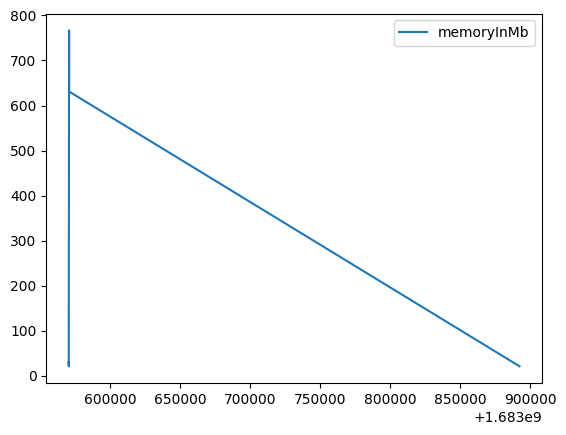

In [3]:
plt.plot(df1["secondsSinceEpoch"], df1["memoryInMb"], label="memoryInMb")
plt.legend()
plt.show()

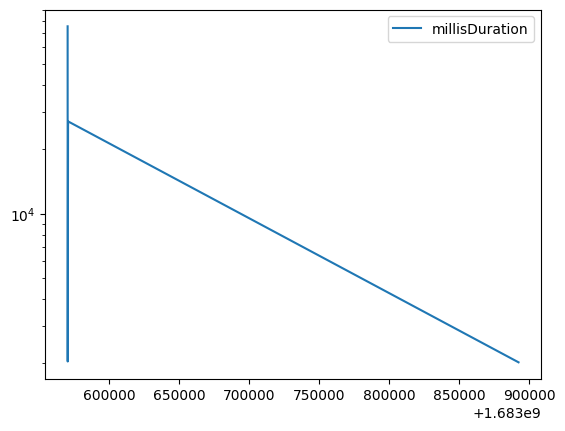

In [4]:
plt.plot(df1["secondsSinceEpoch"], df1["millisDuration"], label="millisDuration")
plt.yscale("log")
plt.legend()
plt.show()

In [5]:
df = pd.read_csv('rmatch-tester/logs/logfile-2023-05-08-20:37:45.csv')

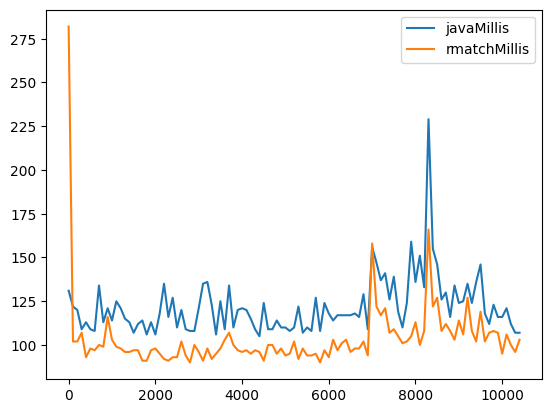

In [6]:
plt.plot(df["NoOfRegexps"], df[" javaMillis"], label="javaMillis")
plt.plot(df["NoOfRegexps"], df[" regexMillis"], label="rmatchMillis")
plt.legend()
plt.show()

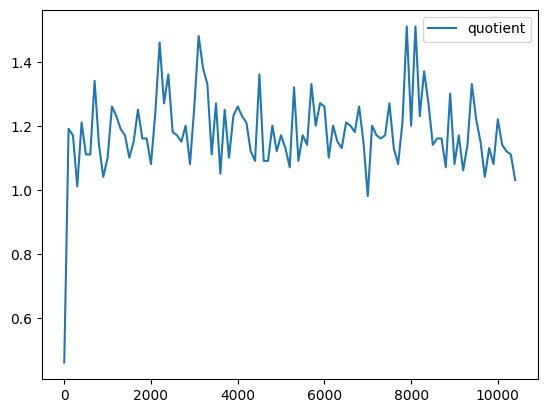

In [7]:
plt.plot(df["NoOfRegexps"], df[" quotient"], label="quotient")
plt.legend()
plt.show()

In [8]:
df[" quotient"].std()

0.12511474586834134

In [9]:
df[" quotient"].mean()

1.181047619047619

In [10]:
df[" javaMillis"].std()

16.22013739593032

In [11]:
df[" javaMillis"].mean()

121.65714285714286

In [12]:
df[" regexMillis"].std()

21.037869221761536

In [13]:
df[" regexMillis"].mean()

103.81904761904762

# Study the large corpus test and evolution over time

In [14]:
largeCorpusDf = pd.read_csv('./rmatch-tester/logs/large-corpus-log.csv')

In [15]:
largeCorpusDf


,timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,2to1Ratio
0,1684151426228,99d2b216-dc52-44c0-b379-3a74a11681a7,master,rmatch,917,4475,java,54,391,0,96068,1154369,1179077,0.000000
1,1684151734259,e3b088d2-65a6-4766-994f-a6bcb020ae63,master,rmatch,599,6621,java,55,375,0,96068,1154369,1179077,0.000000
2,1684152005265,42bb90f0-1649-490b-8826-f918c9092e6a,master,rmatch,247,4169,java,54,351,96068,0,1154369,1179077,0.000000
3,1684152107237,700981ac-a4cd-49a1-9ee3-f17d288559a9,master,rmatch,769,19949,java,148,1709,207832,6111,1154369,1179077,0.000000
4,1684152163314,0f75451c-5881-456c-9eea-d3e5207e35c1,master,rmatch,171,9560,java,100,950,142322,262,1154369,1179077,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,1688415909936,aed3004f-e31a-4a04-835a-c2c70069413e,master,rmatch,675,267873,java,514,86414,1144409,8,19566,1154369,3.099880
110,1688417244874,f27d68ee-5139-478b-a680-90fc30767d19,master,rmatch,715,576281,java,514,15555,1144409,8,19566,1154369,37.047960
111,1688462869292,df8553b2-db5c-418d-9538-833842a5b0f2,master,rmatch,3603,821890,java,517,26909,1144409,8,19566,1154369,30.543312
112,1688463400707,96054c4c-72f7-422d-b60d-e505146a5520,master,rmatch,2091,280919,java,515,58731,1144409,8,19566,1154369,4.783147


In [16]:
largeCorpusDf["regexPerMilli1"] = (largeCorpusDf["noOfRegexps"]  *  largeCorpusDf["corpusLength"]) /   largeCorpusDf["durationInMillis1"]
largeCorpusDf["regexPerMilli2"] = (largeCorpusDf["noOfRegexps"]  *  largeCorpusDf["corpusLength"]) /   largeCorpusDf["durationInMillis2"]
largeCorpusDf["regex2to1ratio"] = largeCorpusDf["regexPerMilli2"] /   largeCorpusDf["regexPerMilli1"]



In [17]:
largeCorpusDf

,timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,2to1Ratio,regexPerMilli1,regexPerMilli2,regex2to1ratio
0,1684151426228,99d2b216-dc52-44c0-b379-3a74a11681a7,master,rmatch,917,4475,java,54,391,0,96068,1154369,1179077,0.000000,3.041542e+08,3.481048e+09,11.445013
1,1684151734259,e3b088d2-65a6-4766-994f-a6bcb020ae63,master,rmatch,599,6621,java,55,375,0,96068,1154369,1179077,0.000000,2.055717e+08,3.629573e+09,17.656000
2,1684152005265,42bb90f0-1649-490b-8826-f918c9092e6a,master,rmatch,247,4169,java,54,351,96068,0,1154369,1179077,0.000000,3.264788e+08,3.877749e+09,11.877493
3,1684152107237,700981ac-a4cd-49a1-9ee3-f17d288559a9,master,rmatch,769,19949,java,148,1709,207832,6111,1154369,1179077,0.000000,6.822848e+07,7.964248e+08,11.672908
4,1684152163314,0f75451c-5881-456c-9eea-d3e5207e35c1,master,rmatch,171,9560,java,100,950,142322,262,1154369,1179077,0.000000,1.423734e+08,1.432726e+09,10.063158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,1688415909936,aed3004f-e31a-4a04-835a-c2c70069413e,master,rmatch,675,267873,java,514,86414,1144409,8,19566,1154369,3.099880,8.431751e+04,2.613741e+05,3.099880
110,1688417244874,f27d68ee-5139-478b-a680-90fc30767d19,master,rmatch,715,576281,java,514,15555,1144409,8,19566,1154369,37.047960,3.919335e+04,1.452034e+06,37.047959
111,1688462869292,df8553b2-db5c-418d-9538-833842a5b0f2,master,rmatch,3603,821890,java,517,26909,1144409,8,19566,1154369,30.543312,2.748103e+04,8.393617e+05,30.543313
112,1688463400707,96054c4c-72f7-422d-b60d-e505146a5520,master,rmatch,2091,280919,java,515,58731,1144409,8,19566,1154369,4.783147,8.040177e+04,3.845735e+05,4.783147


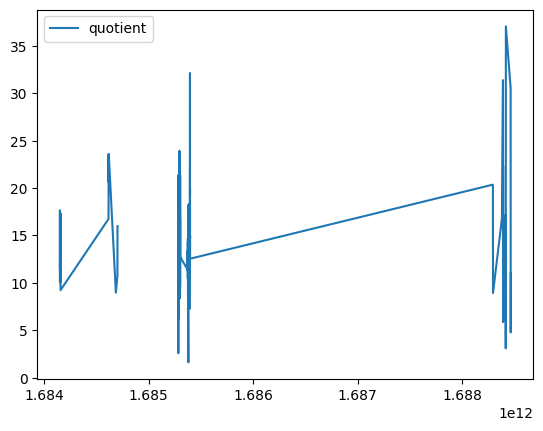

In [18]:
plt.plot(largeCorpusDf["timestamp"], largeCorpusDf["regex2to1ratio"], label="quotient")
plt.legend()
plt.show()

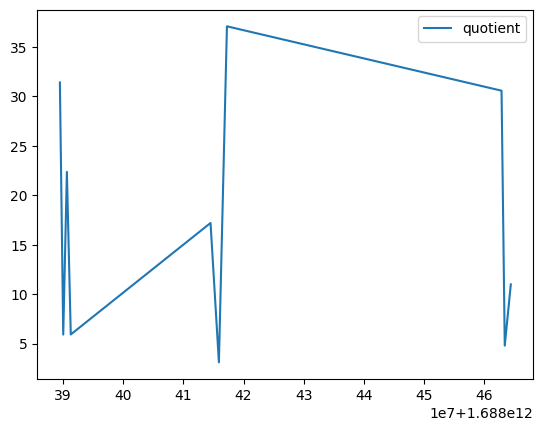

In [19]:
lastTen = largeCorpusDf.iloc[-10:]
plt.plot(lastTen["timestamp"], lastTen["regex2to1ratio"], label="quotient")
plt.legend()
plt.show()

In [20]:

lastTen

,timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,2to1Ratio,regexPerMilli1,regexPerMilli2,regex2to1ratio
104,1688389492609,26d4a12c-5cc9-4901-b5ff-c40e99dda854,master,rmatch,1090,449508,java,514,14326,1144409,8,19566,1154369,31.377077,50246.900731,1.576601e+06,31.377077
105,1688390049638,d3f24480-1518-43fe-8ed8-09a75432a9f0,master,rmatch,453,244731,java,515,41463,1144409,8,19566,1154369,5.902395,92290.653223,5.447359e+05,5.902395
106,1688390654351,1cdf8060-0d59-44bb-b5aa-e918d103a5f9,master,rmatch,2457,317182,java,514,14195,1144409,8,19566,1154369,22.344630,71209.538543,1.591151e+06,22.344628
107,1688391299851,67475556-1e65-40bc-a53a-63896f30c50a,master,rmatch,1149,379922,java,515,64254,1144409,8,19566,1154369,5.912815,59450.055153,3.515172e+05,5.912815
108,1688414520022,e50eafa3-0976-4784-a63c-53f9b271415c,master,rmatch,2306,263092,java,514,15316,1144409,8,19566,1154369,17.177591,85849.755424,1.474692e+06,17.177592
109,1688415909936,aed3004f-e31a-4a04-835a-c2c70069413e,master,rmatch,675,267873,java,514,86414,1144409,8,19566,1154369,3.099880,84317.508125,2.613741e+05,3.099880
110,1688417244874,f27d68ee-5139-478b-a680-90fc30767d19,master,rmatch,715,576281,java,514,15555,1144409,8,19566,1154369,37.047960,39193.351601,1.452034e+06,37.047959
111,1688462869292,df8553b2-db5c-418d-9538-833842a5b0f2,master,rmatch,3603,821890,java,517,26909,1144409,8,19566,1154369,30.543312,27481.030131,8.393617e+05,30.543313
112,1688463400707,96054c4c-72f7-422d-b60d-e505146a5520,master,rmatch,2091,280919,java,515,58731,1144409,8,19566,1154369,4.783147,80401.766538,3.845735e+05,4.783147
113,1688464405914,e4571aad-b8f9-4d48-a7d3-594fc91a7bde,master,rmatch,1493,771097,java,521,70285,1144409,8,19566,1154369,10.971004,29291.235544,3.213543e+05,10.971004


In [21]:
import sqlite3

In [22]:


df = pd.read_csv('./rmatch-tester/logs/large-corpus-log.csv')
print(df)


         timestamp                          testSeriesId metadata   
0    1684151426228  99d2b216-dc52-44c0-b379-3a74a11681a7   master  \
1    1684151734259  e3b088d2-65a6-4766-994f-a6bcb020ae63   master   
2    1684152005265  42bb90f0-1649-490b-8826-f918c9092e6a   master   
3    1684152107237  700981ac-a4cd-49a1-9ee3-f17d288559a9   master   
4    1684152163314  0f75451c-5881-456c-9eea-d3e5207e35c1   master   
..             ...                                   ...      ...   
109  1688415909936  aed3004f-e31a-4a04-835a-c2c70069413e   master   
110  1688417244874  f27d68ee-5139-478b-a680-90fc30767d19   master   
111  1688462869292  df8553b2-db5c-418d-9538-833842a5b0f2   master   
112  1688463400707  96054c4c-72f7-422d-b60d-e505146a5520   master   
113  1688464405914  e4571aad-b8f9-4d48-a7d3-594fc91a7bde   master   

    matcherTypeName1  usedMemoryInMb1  durationInMillis1 matcherTypeName2   
0             rmatch              917               4475             java  \
1             rma

In [23]:
import os
dbfile = 'measurements.sqlite'
if os.path.exists(dbfile):
    os.remove(dbfile)


In [24]:

table_name = 'Measurements'

query = f'Create table if not Exists {table_name} (timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,"2to1Ratio")'


In [25]:
conn = sqlite3.connect(dbfile)
conn.execute(query)
df.to_sql(table_name,conn,if_exists='replace',index=False)
conn.commit()
conn.close()

In [26]:
conn = sqlite3.connect(dbfile)
r_df = pd.read_sql("select * from Measurements",conn)
print(r_df)

         timestamp                          testSeriesId metadata   
0    1684151426228  99d2b216-dc52-44c0-b379-3a74a11681a7   master  \
1    1684151734259  e3b088d2-65a6-4766-994f-a6bcb020ae63   master   
2    1684152005265  42bb90f0-1649-490b-8826-f918c9092e6a   master   
3    1684152107237  700981ac-a4cd-49a1-9ee3-f17d288559a9   master   
4    1684152163314  0f75451c-5881-456c-9eea-d3e5207e35c1   master   
..             ...                                   ...      ...   
109  1688415909936  aed3004f-e31a-4a04-835a-c2c70069413e   master   
110  1688417244874  f27d68ee-5139-478b-a680-90fc30767d19   master   
111  1688462869292  df8553b2-db5c-418d-9538-833842a5b0f2   master   
112  1688463400707  96054c4c-72f7-422d-b60d-e505146a5520   master   
113  1688464405914  e4571aad-b8f9-4d48-a7d3-594fc91a7bde   master   

    matcherTypeName1  usedMemoryInMb1  durationInMillis1 matcherTypeName2   
0             rmatch              917               4475             java  \
1             rma

In [27]:
with open('summarize-large-corpus-trials.sql', 'r') as file:
    summarizerSql = file.read().rstrip()


In [28]:
summarizerSql

"select min(timestamp) as timestamp,\n       testSeriesId,\n       metadata,\n       noOfMatches,\n       noOfMismatches,\n       corpusLength,\n       noOfRegexps,\n       min(durationInMillis2) as 'minJavaDuration',\n       max(durationInMillis2) as 'maxJavaDuration',\n       avg(durationInMillis2) as 'avgJavaDuration',\n       min(durationInMillis1) as 'minRegexDuration',\n       max(durationInMillis1) as 'maxRegexDuration',\n       avg(durationInMillis1) as 'avgRegexDuration',\n--       stdev(durationInMillis2) as 'stdevJavaDuration',\n--       stdev(durationInMillis1) as 'stdevRegexDuration',\n       ((1.0*min(durationInMillis1))/6154) as 'againstBestJavaRatio',\n       ((1.0*min(durationInMillis1))/(1.0*min(durationInMillis2))) as 'minMinRatio',\n       ((1.0*max(durationInMillis1))/(1.0*max(durationInMillis2))) as 'maxMaxRatio',\n       ((1.0*avg(durationInMillis1))/(1.0*avg(durationInMillis2))) as 'avgAvgRatio'\n--       ((1.0*stdev(durationInMillis1))/(1.0*stdev(durationInMill

In [29]:

conn = sqlite3.connect(dbfile)
r_df = pd.read_sql(summarizerSql, conn)

print(r_df)
conn.close()


        timestamp                          testSeriesId   
0   1685300128023  A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD  \
1   1685374976474  8383FDD9-A509-4046-8F04-FD430BB07BA8   
2   1685380210149  28CC3751-BA44-4B0D-BA81-27F159A3079C   
3   1685390284561  58C63D2D-F066-415C-AE24-E045B873D387   
4   1685395218314  73EE6D74-51C3-46AD-9650-47FAD020E03E   
5   1688293228362  ee991b8d-eea0-46f3-9384-0db904fbb63f   
6   1688294215975  e0344a5f-fe7f-40dc-ac17-9246520282f9   
7   1688379457803  f95c455d-75c3-4562-9900-13db30384c9e   
8   1688389492609  26d4a12c-5cc9-4901-b5ff-c40e99dda854   
9   1688390049638  d3f24480-1518-43fe-8ed8-09a75432a9f0   
10  1688390654351  1cdf8060-0d59-44bb-b5aa-e918d103a5f9   
11  1688391299851  67475556-1e65-40bc-a53a-63896f30c50a   
12  1688414520022  e50eafa3-0976-4784-a63c-53f9b271415c   
13  1688415909936  aed3004f-e31a-4a04-835a-c2c70069413e   
14  1688417244874  f27d68ee-5139-478b-a680-90fc30767d19   
15  1688462869292  df8553b2-db5c-418d-9538-833842a5b0f2 

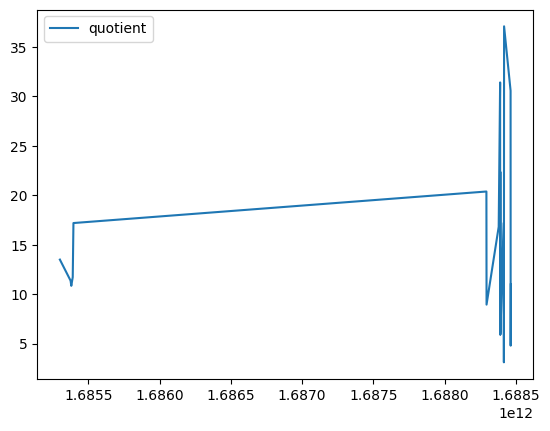

In [30]:
lastTen = r_df.iloc[-100:]
plt.plot(r_df["timestamp"], lastTen["minMinRatio"], label="quotient")
plt.legend()
plt.show()